INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de l'application d'un filtre anti-blocs

In [1]:
import numpy as np
import matplotlib.pyplot as py

Lecture de l'image. Image transformée en double précision pour les calculs 

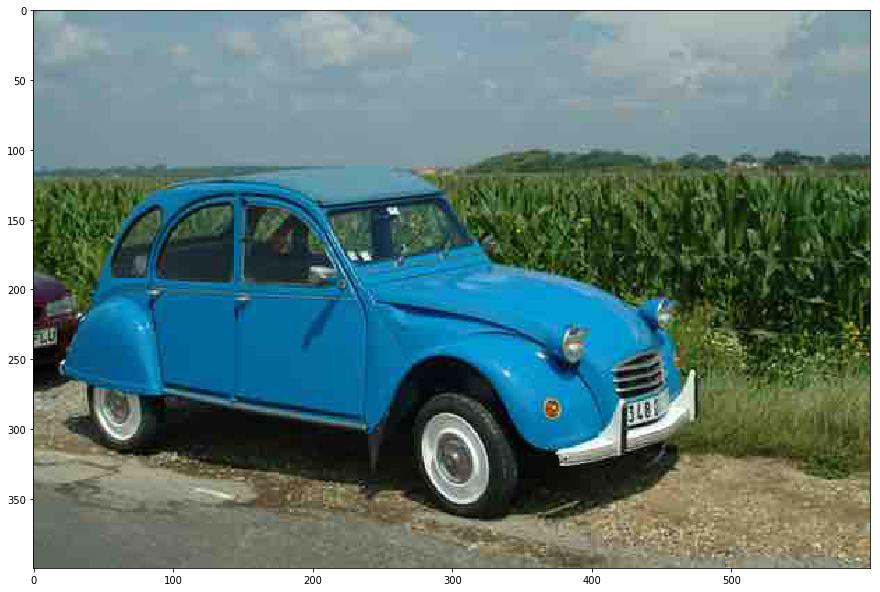

In [2]:
fig = py.figure(figsize = (15,15))
imagelue = py.imread('RGBBlocs.jpg')
image=imagelue.astype('double')
py.imshow(imagelue)
py.show()

Notez les effets de blocs dans le ciel et sur la voiture. Appliquons le filtre anti-blocs sur les lignes.

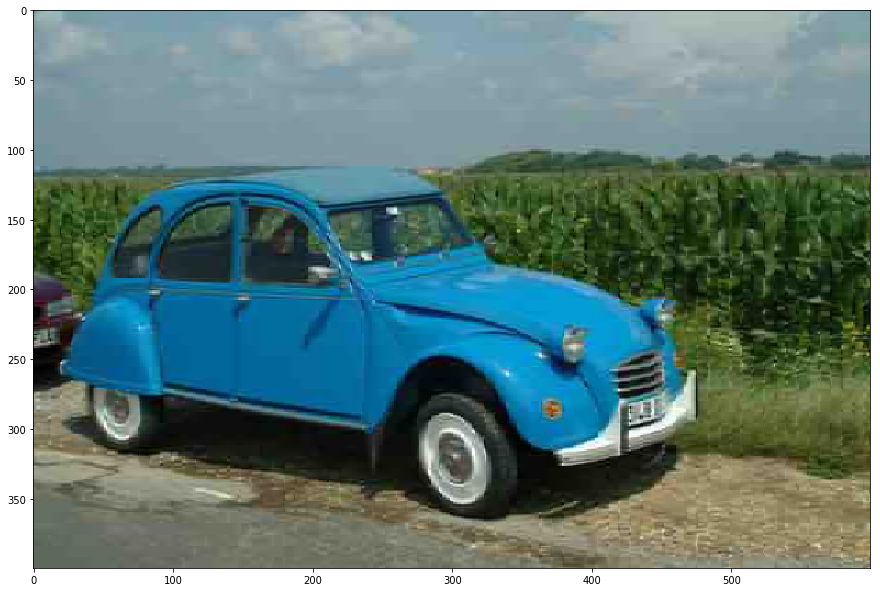

In [3]:
imageout = np.copy(image)
for i in range(0,len(image)):
    for j in range(8,len(image[0]),8):
        p0=image[i][j-1]
        p1=image[i][j-2]
        p2=image[i][j-3]
        p3=image[i][j-4]
        q0=image[i][j]
        q1=image[i][j+1]
        q2=image[i][j+2]
        q3=image[i][j+3]
        imageout[i][j-1] = (p2 + p1 + p0 + q0 + q1)/5
        imageout[i][j-2] = (p2 + p1 + p0 + q0)/4
        imageout[i][j-3] = (p3 + p2 + p1 + p0 + q0)/5
        imageout[i][j] = (q2 + q1 + q0 + p0 + p1)/5
        imageout[i][j+1] = (q2 + q1 + q0 + p0)/4
        imageout[i][j+2] = (q3 + q2 + q1 + q0 + p0)/5
        
fig = py.figure(figsize = (15,15))
imageout = np.clip(imageout,0,255)
imageout=imageout.astype('uint8')
py.imshow(imageout)
py.show()      

Les effets de blocs sont diminués dans le ciel et sur la voiture. Par contre, la netteté des feuillages est grandement réduite. En fait, on filtre trop et le feuillage prend l'apparence de blocs de valeurs semblables. Terminons en filtrant les colonnes. 

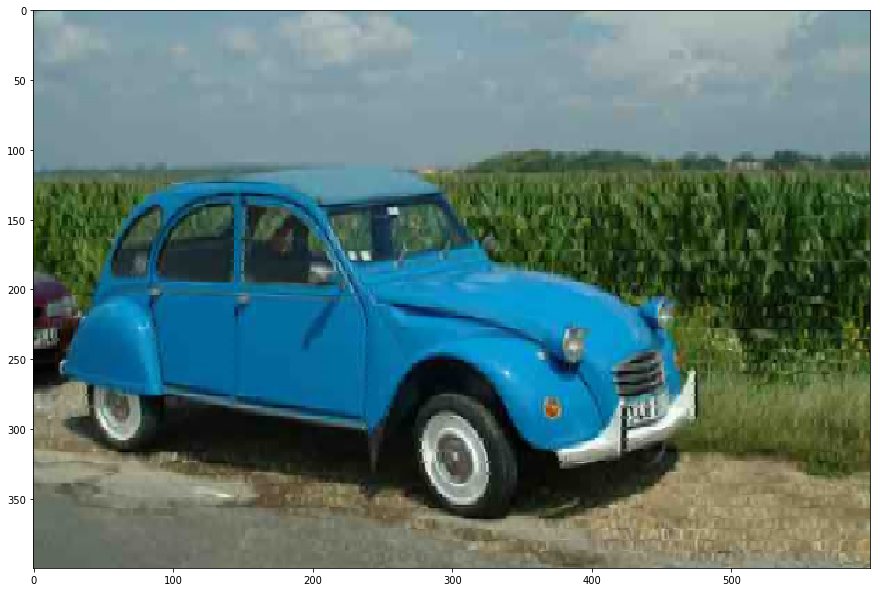

In [4]:
for i in range(8,len(image),8):
    for j in range(len(image[0])):
        p0=image[i-1][j]
        p1=image[i-2][j]
        p2=image[i-3][j]
        p3=image[i-4][j]
        q0=image[i][j]
        q1=image[i+1][j]
        q2=image[i+2][j]
        q3=image[i+3][j]
        imageout[i-1][j] = (p2 + p1 + p0 + q0 + q1)/5
        imageout[i-2][j] = (p2 + p1 + p0 + q0)/4
        imageout[i-3][j] = (p3 + p2 + p1 + p0 + q0)/5
        imageout[i][j] = (q2 + q1 + q0 + p0 + p1)/5
        imageout[i+1][j] = (q2 + q1 + q0 + p0)/4
        imageout[i+2][j] = (q3 + q2 + q1 + q0 + p0)/5
        
fig = py.figure(figsize = (15,15))
imageout = np.clip(imageout,0,255)
imageout=imageout.astype('uint8')
py.imshow(imageout)
py.show()      

Mêmes conclusions... Essayons avec un filtrage moins fort. Remplace 4 pixels frontières plutôt que 6.

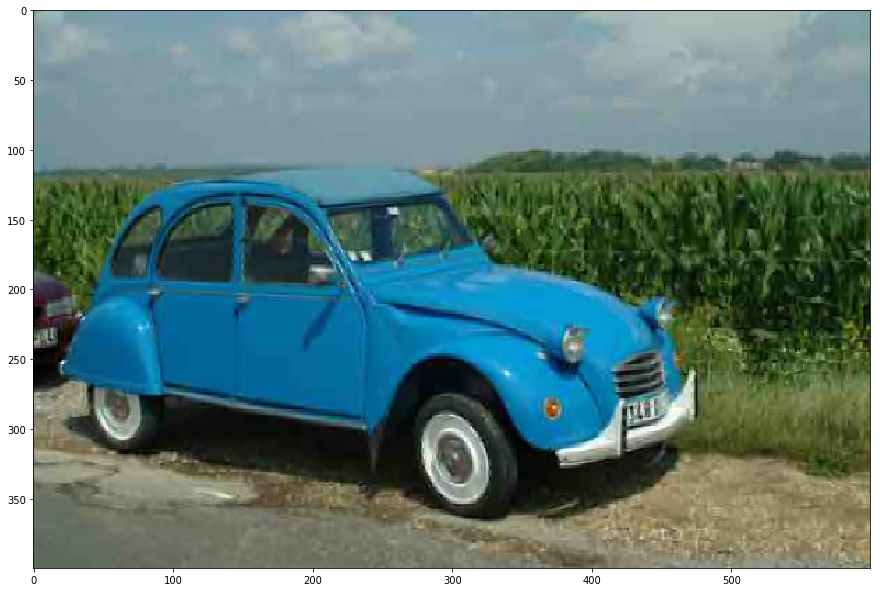

In [5]:
imageout = np.copy(image)
for i in range(0,len(image)):
    for j in range(8,len(image[0]),8):
        p0=image[i][j-1]
        p1=image[i][j-2]
        p2=image[i][j-3]
        #p3=image[i][j-4]
        q0=image[i][j]
        q1=image[i][j+1]
        q2=image[i][j+2]
        #q3=image[i][j+3]
        imageout[i][j-1] = (p2 + p1 + p0 + q0 + q1)/5
        imageout[i][j-2] = (p2 + p1 + p0 + q0)/4
        #imageout[i][j-3] = (p3 + p2 + p1 + p0 + q0)/5
        imageout[i][j] = (q2 + q1 + q0 + p0 + p1)/5
        imageout[i][j+1] = (q2 + q1 + q0 + p0)/4
        #imageout[i][j+2] = (q3 + q2 + q1 + q0 + p0)/5
        
for i in range(8,len(image),8):
    for j in range(len(image[0])):
        p0=image[i-1][j]
        p1=image[i-2][j]
        p2=image[i-3][j]
        #p3=image[i-4][j]
        q0=image[i][j]
        q1=image[i+1][j]
        q2=image[i+2][j]
        #q3=image[i+3][j]
        imageout[i-1][j] = (p2 + p1 + p0 + q0 + q1)/5
        imageout[i-2][j] = (p2 + p1 + p0 + q0)/4
        #imageout[i-3][j] = (p3 + p2 + p1 + p0 + q0)/5
        imageout[i][j] = (q2 + q1 + q0 + p0 + p1)/5
        imageout[i+1][j] = (q2 + q1 + q0 + p0)/4
        #imageout[i+2][j] = (q3 + q2 + q1 + q0 + p0)/5
        
fig = py.figure(figsize = (15,15))
imageout = np.clip(imageout,0,255)
imageout=imageout.astype('uint8')
py.imshow(imageout)
py.show()              

Le feuillage est mieux préservé. Le ciel est aussi mieux filtré. Pour la voiture, c'est comparable. Dans les algorithme plus performant de filtrage, le filtrage est adapté selon le contenu local de l'image. Certaines régions sont filtrés fortement, et d'autres moins.